In [ ]:
# baging and pasting : an ensemble of models in which individual models are trained on diffrent random subset of training data 

##### using the concrete data base our objective is to predict the strengh of concrete measured by "csMPA"

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('concrete_data.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

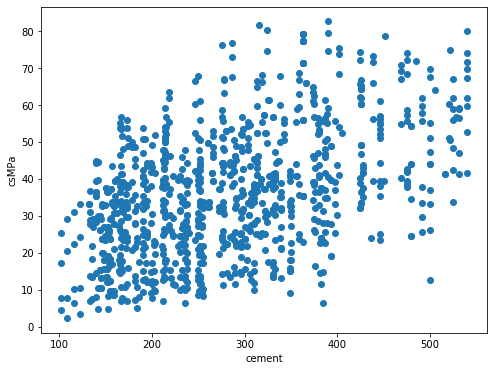

In [8]:
# scatter plot to see how the cement content affects the strengh concrete
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(data['cement'], data['csMPa'])
plt.xlabel('cement')
plt.ylabel('csMPa')

there is definetly a a positive linear relationship 

##### you can do the same  by checking relationship of the target variable "csMPa" with other variables 
***

In [9]:
# correlation matrice 
data_corr = data.corr()

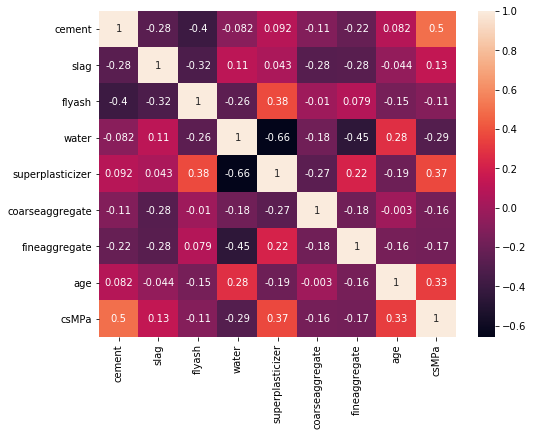

In [11]:
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_corr, annot =True)

In [12]:
# setup target and features (x and y )
x = data.drop('csMPa', axis=1)
y = data['csMPa']

In [13]:
# these are the features used to train the model 
x.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [16]:
x_train.shape, y_train.shape

((824, 8), (824,))

### Bagging Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

### Pasting

- Here we perform sampling without replacement (bootstrap=False), this method is called pasting

In [18]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [19]:
 bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [20]:
y_pred = bag_reg.predict(x_test)

In [21]:
# set up actual values vs predicted values in a data frame 
df =pd.DataFrame( {'Actual':y_test,
                   'Predicted':y_pred})
df.sample(10)

,Actual,Predicted
408,20.73,7.02522
883,32.96,32.96000
363,63.53,66.42000
400,67.87,45.68812
387,51.02,60.52426
445,36.56,35.46098
635,15.58,14.80000
45,35.08,32.91246
170,57.60,55.20000
303,48.97,56.71316


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.831562542131616

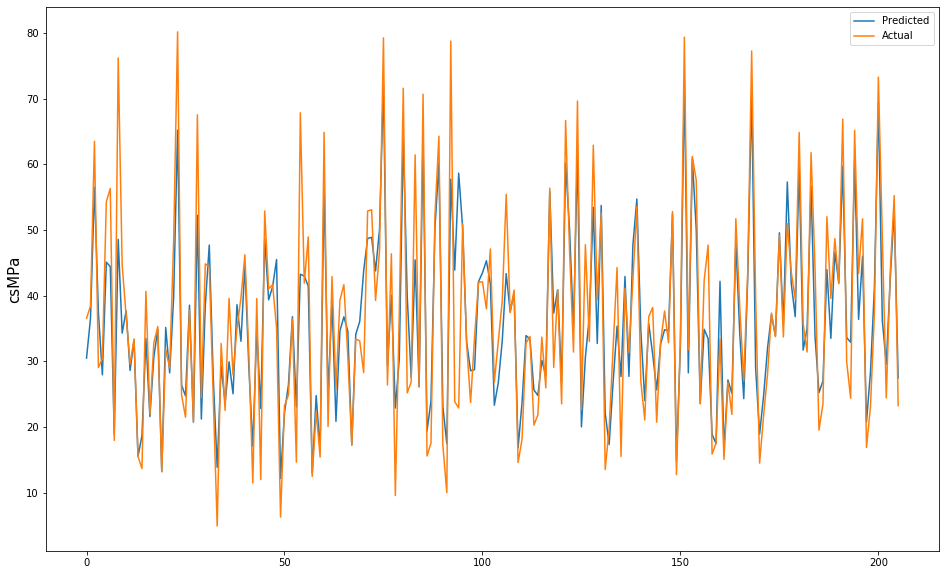

In [34]:
plt.figure(figsize = (16, 10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('csMPa', fontsize=15)

plt.legend()
plt.show()

### Bagging
- Here we perform sampling with replacement (bootstrap=True), this method is called bagging. 

So 63% of the training instances are sampled on average for each predictor. By setting oob_score=True we are doing an automatic evaluation after training using the remaining 37% of the training instance which is not sampled and this data is called out-of-bags(oob).

In [28]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

bag_reg.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [29]:
 bag_reg.oob_score_

0.9150144604100843

In [30]:
y_pred =  bag_reg.predict(x_test)
r2_score(y_test,y_pred)

0.8927974409667099

#### Random Subspaces

- Keep all the training instances (bootstrap=False and max_samples=1.0) 
- But sample features (bootstrap_features=True and/or max_features=smaller than 1) 

In [31]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=1.0,
                           bootstrap_features=True,
                           max_features=0.8,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [32]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8142584964220009